# Neural Networks with Keras

![keras](https://editor.analyticsvidhya.com/uploads/56846f3ff4855a71201b102f92a733fd5a875.png)

## Use Case 1: Iris Dataset

### Binary classification

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binary classification: Setosa or not Setosa
y_binary = (y == 0).astype(int)
# One-hot encode the target variable

In [2]:
y_binary

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
y_one_hot = to_categorical(y_binary, num_classes=2)
y_one_hot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)
# model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Predict raw probabilities
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1).reshape(-1, 1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/50
12/12 [==============================] - 0s 11ms/step - loss: 0.9259 - accuracy: 0.2604 - val_loss: 1.0317 - val_accuracy: 0.0833
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 0.8884 - accuracy: 0.1146 - val_loss: 0.9752 - val_accuracy: 0.0417
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 0.8555 - accuracy: 0.0521 - val_loss: 0.9238 - val_accuracy: 0.0417
Epoch 4/50
12/12 [==============================] - 0s 1ms/step - loss: 0.8245 - accuracy: 0.0729 - val_loss: 0.8793 - val_accuracy: 0.0417
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 0.7971 - accuracy: 0.1146 - val_loss: 0.8399 - val_accuracy: 0.1667
Epoch 6/50
12/12 [==============================] - 0s 1ms/step - loss: 0.7736 - accuracy: 0.1250 - val_loss: 0.8035 - val_accuracy: 0.2083
Epoch 7/50
12/12 [==============================] - 0s 1ms/step - loss: 0.7509 - accuracy: 0.1979 - val_loss: 0.7724 - val_accuracy: 0.2500
Epoch 8/50
12/12 [=

In [5]:
y_pred_prob = model.predict(X_test)
# y_pred_prob
y_pred = np.argmax(y_pred_prob, axis=1).reshape(-1, 1)
y_pred

1/1 [==============================] - 0s 6ms/step


array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [6]:
model.summary()

# dense -- (x*w + b) -- 4 input features, 8 output features, 8 bias -- 4*8 + 8 = 32 + 8 = 40
# dense_1 -- (x*w + b) -- 8 input features, 2 output features, 2 bias -- 8*2 + 2 = 16 + 2 = 18


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 2)                 18        
                                                                 
Total params: 58 (232.00 Byte)
Trainable params: 58 (232.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
X_train.shape[1]

4

4343/4343 [==============================] - 1s 229us/step


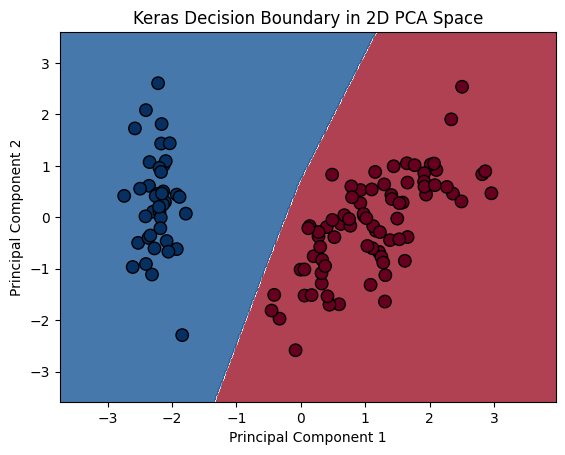

In [8]:
# understand the underlying data
from sklearn.decomposition import PCA

def display_decision_boundary(X, y_true, model):
    pca = PCA(n_components=2)
    # train
    X_pca = pca.fit_transform(X)
    
    # Plot decision boundary in the 2D PCA space
    h = .02  # step size in the mesh
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    # Predict raw probabilities
    y_pred = np.argmax(Z, axis=1).reshape(-1, 1)

    # Put the result into a color plot
    Z = y_pred.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.argmax(y_true, axis=1).reshape(-1, 1), edgecolors='k', cmap=plt.cm.RdBu, marker='o', s=80)
    plt.title('Keras Decision Boundary in 2D PCA Space')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

display_decision_boundary(X_train, y_train, model)

3608/3608 [==============================] - 1s 226us/step


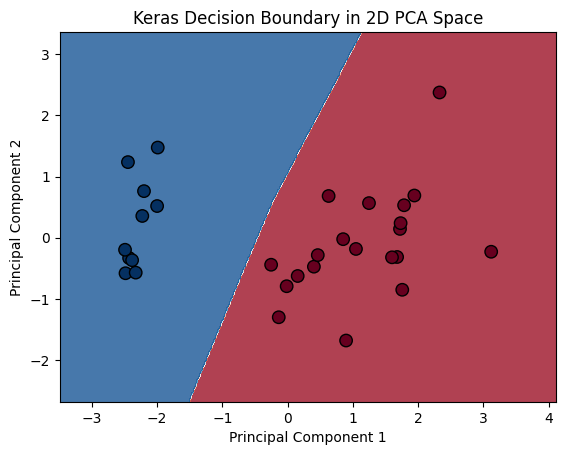

In [9]:
import numpy as np

display_decision_boundary(X_test, y_test, model)

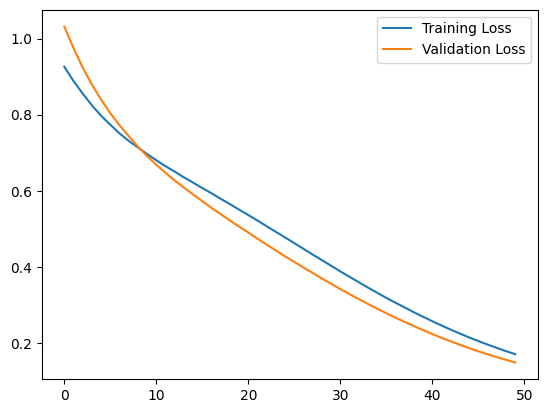

In [10]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

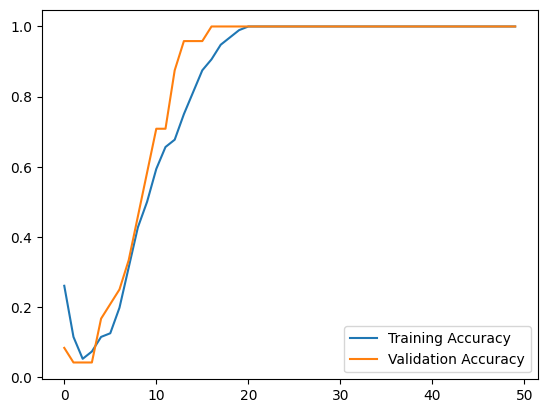

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [12]:
from keras.layers import Dropout

# Build a neural network with dropout
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(units=2, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)
# model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Predict raw probabilities
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1).reshape(-1, 1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6749 - accuracy: 0.6771 - val_loss: 0.5989 - val_accuracy: 1.0000
Epoch 2/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6327 - accuracy: 0.7396 - val_loss: 0.5732 - val_accuracy: 1.0000
Epoch 3/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.7812 - val_loss: 0.5486 - val_accuracy: 1.0000
Epoch 4/50
12/12 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.7812 - val_loss: 0.5250 - val_accuracy: 1.0000
Epoch 5/50
12/12 [==============================] - 0s 1ms/step - loss: 0.5999 - accuracy: 0.7708 - val_loss: 0.5022 - val_accuracy: 1.0000
Epoch 6/50
12/12 [==============================] - 0s 1ms/step - loss: 0.5537 - accuracy: 0.8438 - val_loss: 0.4801 - val_accuracy: 1.0000
Epoch 7/50
12/12 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.8438 - val_loss: 0.4605 - val_accuracy: 1.0000
Epoch 8/50
12/12 [==

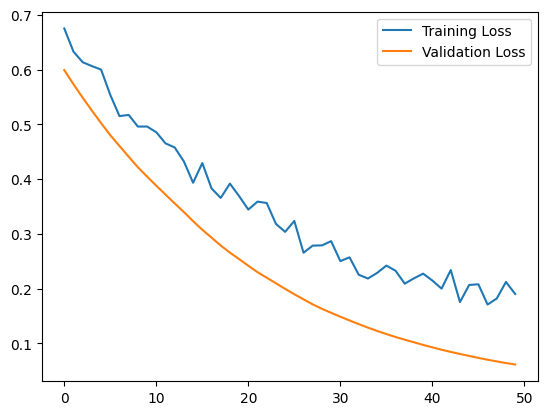

In [13]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

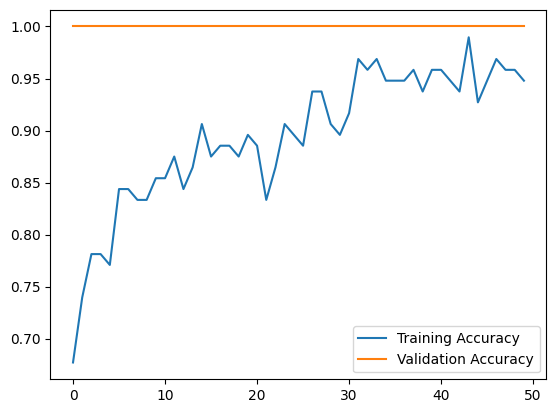

In [14]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

### Multi-class prediction

In [15]:
https://colab.research.google.com/drive/1BhKRmnAx4KZsXazfl1oJ-NN7p1XYfUz9?hl=de#scrollTo=ixeJHZIiHjvh

SyntaxError: invalid syntax (295444321.py, line 1)

In [ ]:
# One-hot encode the target variable
y_one_hot = to_categorical(y, num_classes=3)
y_one_hot

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import time

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# One-hot encode the target variable
y_one_hot = to_categorical(y, num_classes=3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## TODO compare CPU and GPU

time_start = time.time()

# Build a neural network for multi-class classification
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(units=3, activation='softmax'))  # Three units for three classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

In [ ]:
display_decision_boundary(X_train, y_train, model)

### Callbacks

#### Model Checkpoint

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Build a neural network for multi-class classification
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(units=3, activation='softmax'))  # Three units for three classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Configure the checkpointing
# https://www.tensorflow.org/guide/keras/serialization_and_saving#apis
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, callbacks=[checkpoint], verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
import tensorflow as tf
best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
best_model.summary()

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
!rm -rf ./logs/

# Build a neural network for multi-class classification
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(units=3, activation='softmax'))  # Three units for three classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Configure the checkpointing
early_stopping = EarlyStopping(patience=2, monitor='val_accuracy')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir='./logs')

callback_list = [
    early_stopping,
    model_checkpoint,
    tensorboard
]

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, callbacks=[callback_list], verbose=0) # Suppress chatty output; use Tensorboard instead

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# !tensorboard --logdir logs



In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler, CSVLogger
from tensorflow.keras.optimizers.legacy import SGD

import tensorflow as tf
from datetime import datetime

!rm -rf ./logs/

now = datetime.now().strftime("%Y%m%d-%H%M%S")

logdir = f"logs/{now}"
file_writer = tf.summary.create_file_writer(logdir + "/metrics")
file_writer.set_as_default()

def lr_schedule(epoch):
  """
  Returns a custom learning rate that decreases as epochs progress.
  """
  learning_rate = 0.2
  if epoch > 10:
    learning_rate = 0.02
  if epoch > 20:
    learning_rate = 0.01
  if epoch > 50:
    learning_rate = 0.005

  tf.summary.scalar('learning rate', data=learning_rate, step=epoch)
  return learning_rate

lr_callback = LearningRateScheduler(lr_schedule)
logger = CSVLogger(f"model_run_{now}.csv", separator=",", append=False)

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir=logdir)

checkpoints = [
    logger,
    model_checkpoint,
    tensorboard,
    lr_callback
]

# Build a neural network for multi-class classification
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(units=3, activation='softmax'))  # Three units for three classes

model.compile(
    loss='categorical_crossentropy', metrics=['accuracy'],
    optimizer=SGD(),
)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, callbacks=[checkpoints], verbose=0) # Suppress chatty output; use Tensorboard instead

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

### Hyperparameter Optimization with Tensorboard

In [ ]:
# HP Opt
# https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

!rm -rf ./logs/

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.3, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=tf.nn.relu, input_dim=X_train.shape[1]),
        tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
    ])    
    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss='categorical_crossentropy', metrics=['accuracy'],
    )
    
    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=1) # Reduce amount of epochs to speed things up
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy}")
    return test_accuracy


In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

In [ ]:
!tensorboard --logdir logs/hparam_tuning

## Use Case 2: IMDB Reviews

In [ ]:
from keras.datasets import imdb

In [ ]:
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=NUM_WORDS) # в кожній завантаженій рецензії ми залишимо лише ті слова, які зустрічаються не менше 10000 разів, більш рідкісні будуть проігноровані. 
# Завдяки такому обмеженню ми отримаємо тензори адекватних розмірів.

In [ ]:
print(train_data[0])

In [ ]:
word_index = imdb.get_word_index()
word_index.items()

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
print(decoded_review)

In [ ]:
def decode(item):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in item])

decode(train_data[0])

In [ ]:
print(train_data.shape)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=NUM_WORDS):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_train  # bag of words

In [ ]:
print(x_train.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses

model = Sequential([
    Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='rmsprop',
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)

In [ ]:
model.summary()

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

!rm -rf ./logs/
tensorboard = TensorBoard(log_dir='./logs')


history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    callbacks = tensorboard,
    validation_data=(x_val, y_val)
)

In [ ]:
!tensorboard --logdir logs

In [ ]:
print(history.history.keys())

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

In [ ]:
result = model.predict(x_test[0, :].reshape(1, 10000))
print(result)

In [ ]:
decode(test_data[0])

In [ ]:
test_labels[0]

In [ ]:
model.save("my_model.keras")

In [ ]:
import keras
model = keras.models.load_model("my_model.keras")

In [ ]:
model.summary()